<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Brent Reynolds**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
#example - you will replace this with the models you are actually using.
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/MLA1_BSR/banknote_authentication.csv')

### Statistical and Visual Exploration

### Splitting Data into Train/Test

In [9]:
X = df.drop(['forgery'], axis=1)
y = df['forgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [10]:
# Create preprocessor for numerical variables
numeric_features = X.columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [11]:
# Create the pipeline
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

### Executing the Model

In [12]:
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

### Evaluating Model

In [13]:
y_pred = clf_pipeline.predict(X_test)

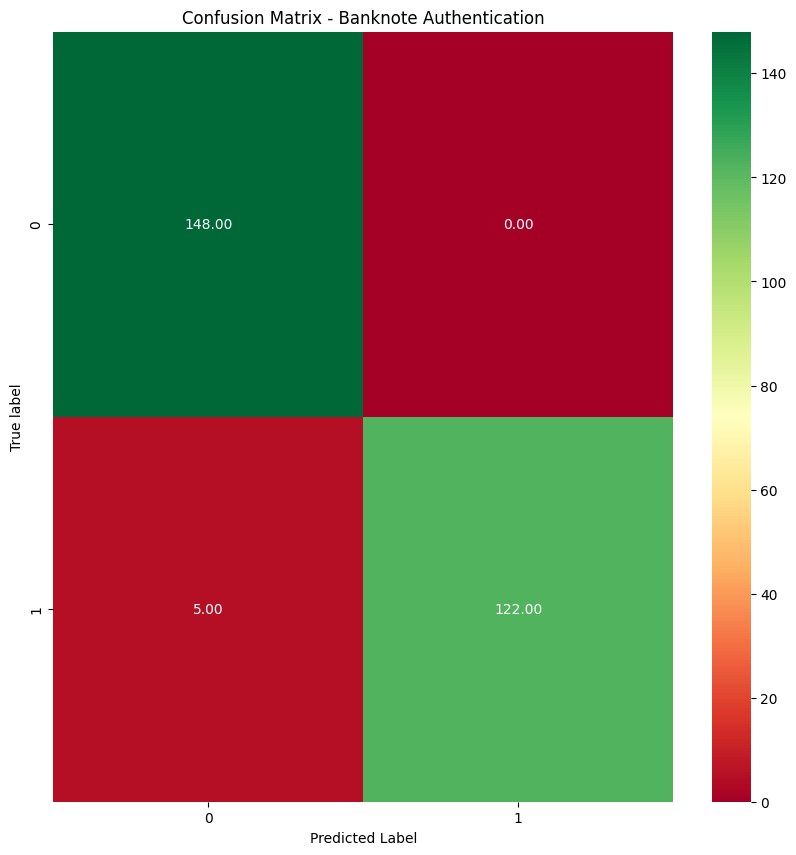

In [14]:
# Generate confusion matrix
plot_cm(y_test, y_pred)
plt.title('Confusion Matrix - Banknote Authentication')
plt.show()

In [15]:
# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Classification Performance Metrics:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Classification Performance Metrics:
Precision: 1.000
Recall: 0.961
F1 Score: 0.980


### Interpretation of Results
The precision score of 1.000 or 100%, which means that the model is correct 100% of the time when the model predicts that a banknote is a forgery. This also means that there aren't any false positives which is important because it limits the ammount of false accusations of banknote forgeries.

The recall score of 0.961 or 96.1% means that the model successfully identifies about 96.1% of banknote forgeries in the data that are actual forgeries. This high recall score shows that the model is performing well.

The F1 score of 0.980 or 98% means that there is a good balance of precision and recall. The F1 score is very high which shows that the model is performing well.

### Conclusion
The Decision Tree Classifier showed high results on precision, recall, and F1 scores which means that the model is performing well at banknote authentication. Given these high scores, the model is suitable for predicting whether or not a banknote is a forgery.

## Problem 2

### Reading the Data

In [16]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/MLA1_BSR/Steel_industry_data.csv')

In [17]:
# Rename columns
column_mapping = {
    'Usage_kWh': 'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor': 'lag_current_pwr',
    'Leading_Current_Power_Factor': 'lead_current_pwr',
    'NSM': 'nsm',
    'WeekStatus': 'week_status',
    'Day_of_week': 'day_of_week',
    'Load_Type': 'load_type'
}
df = df.rename(columns=column_mapping)

### Splitting Data into Train/Test

In [18]:
X = df.drop(['date', 'usage_kwh'], axis=1)
y = df['usage_kwh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [19]:
# Identify numeric and categorical columns
numeric_features = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'lag_current_pwr',
                   'lead_current_pwr', 'nsm']
categorical_features = ['week_status', 'day_of_week', 'load_type']

In [20]:
# Create preprocessors for numerical and categorical variables
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [21]:
# Create the pipeline
regressor_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=4,
        random_state=42
    ))
])

### Executing the Model

In [22]:
regressor_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['week_status', 'day_of_week',
                                                   'load_type'])])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=5, min_samples_leaf=4,
                                       min_samples_split=5, random_state=42))])

### Evaluating Model

In [23]:
y_pred = regressor_pipeline.predict(X_test)

In [24]:
# Calculate RMSE for train and test
train_pred = regressor_pipeline.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nRegression Performance Metrics:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Regression Performance Metrics:
Train RMSE: 6.58
Test RMSE: 6.71


### Interpretation of Results
The RMSE of 6.58 and 6.71 for Train and Test respectively mean that on average the model's predictions deviate from the actual kWh usage values by around 6.71 kWh. The Train and Test RMSE scores are close in value which mean that the model is performing consistently between training data and testing data. This is good since it means that the model is not overfit.

### Conclusion
The model performs moderately well at predicting kWh usage and is consistent between the training data and testing data. However, it would be beneficial for the RMSE value to be lower before using this model in real life scenarios since that level of deviation from the actual values might cause an issue.